In [1]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()#eksik gözlemleri sildik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table=df["table"]

In [3]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

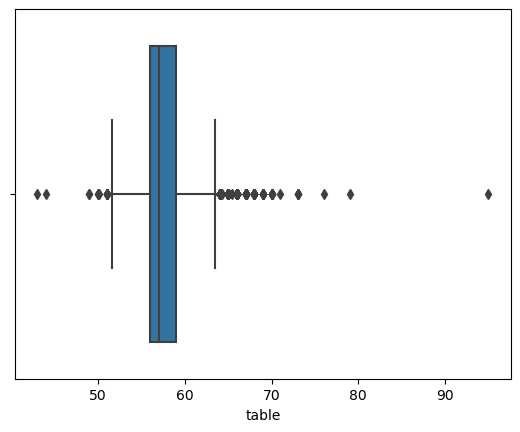

In [5]:
sns.boxplot(x=df_table)

In [6]:
Q1=df_table.quantile(0.25)

In [8]:
Q3=df_table.quantile(0.75)

In [9]:
IQR=Q3-Q1

In [10]:
Q1

56.0

In [11]:
Q3

59.0

In [12]:
alt_esik=Q1-1.5*IQR

In [13]:
üst_esik=Q3+1.5*IQR

In [14]:
alt_esik

51.5

In [15]:
üst_esik

63.5

In [37]:
df_table[df_table<alt_esik]#alt_sınırdan küçük olan aykırı degerler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [23]:
df_table[df_table>üst_esik]#üst sınırdan büyük olan aykırı degerler

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [33]:
aykırı_df=(df_table<alt_esik) | (df_table>üst_esik)#aykırı degerleri true-false olarak gösterimi

In [35]:
aykırı_df#aykırı degerler

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [36]:
aykırı_df.index#aykırı deger index sorgulama

RangeIndex(start=0, stop=53940, step=1)

In [39]:
##AYKIRI DEGER PROBLERMİNİ ÇÖZMEK

In [40]:
df_table[aykırı_df]#aykırı degerleri aldık

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [42]:
#AYKIRI GÖZLEM SİLME İŞLEMİ

In [43]:
import pandas as pd

In [44]:
type(df_table)

pandas.core.series.Series

In [45]:
df_table=pd.DataFrame(df_table)#df_table dataframe dönüştürme işlemi yaptık

In [46]:
df_table

,table
0,55.0
1,61.0
2,65.0
3,58.0
4,58.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [47]:
type(df_table)

pandas.core.frame.DataFrame

In [48]:
df_table.shape

(53940, 1)

In [53]:
#aykır deger olan verileri sildik
#//(~ = koşulu sağlamayanları al)
temiz_df=df_table[~((df_table<alt_esik) | (df_table>üst_esik)).any(axis=1)]

In [54]:
temiz_df

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [55]:
temiz_df.shape

(53335, 1)

In [56]:
###ORTALAMA İLE DOLDURMA İŞLEMİ

In [58]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()#eksik gözlemleri sildik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [59]:
df_table=df["table"]

In [60]:
aykırı_df.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [61]:
df_table[aykırı_df]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [62]:
df_table.mean()

57.45718390804598

In [63]:
#aykırı degerleri ortalama ile doldurduk
df_table[aykırı_df]=df_table.mean()

C:\Users\alper\AppData\Local\Temp\ipykernel_15956\3605573713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykırı_df]=df_table.mean()


In [64]:
df_table[aykırı_df]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

In [65]:
#BASKILAMA YÖNTEMİ

In [66]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()#eksik gözlemleri sildik
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [68]:
df_table=df["table"]

In [71]:
#alt_eşik degerinden küçük olan aykırı degerleri alt eşik degerine eşitledik
df_table[df_table<alt_esik]=alt_esik

C:\Users\alper\AppData\Local\Temp\ipykernel_15956\2919536532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_table<alt_esik]=alt_esik


In [75]:
#üst_eşik degerinden büyük olan degerleri üst eşik degerine eşitledik
df_table[df_table>üst_esik]=üst_esik

C:\Users\alper\AppData\Local\Temp\ipykernel_15956\3354998100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[df_table>üst_esik]=üst_esik


In [77]:
df_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [78]:
alt_esik

51.5

In [79]:
üst_esik

63.5